In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
COLAB = True
print("Note: using Google CoLab")
%tensorflow_version 2.x

Mounted at /content/drive
Note: using Google CoLab


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import cv2
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split
%matplotlib inline

In [ ]:
image_data = "/content/drive/My Drive/DMW/pickled_data.txt"
data = "/content/drive/My Drive/DMW/Preprocessing/amd/"

In [ ]:
normal_left_y = pd.read_csv(data + 'amd_all_left.csv').iloc[:,3]
normal_left_n = pd.read_csv(data + 'not_amd_left.csv').iloc[:,3]

normal_right_y = pd.read_csv(data + 'amd_all_right.csv').iloc[:,3]
normal_right_n = pd.read_csv(data + 'not_amd_right.csv').iloc[:,3]
len(normal_left_y), len(normal_left_n), len(normal_right_y), len(normal_right_n)

(136, 3336, 144, 3336)

In [ ]:
x_l = []
y_l = []
x_r = []
y_r = []
size_l = 50
size_b = 50

myfile = open(image_data, mode='rb')
temp = pickle.load(myfile)
myfile.close()

# count = 0
for image_name in normal_left_y:
  try:
    # count += 1
    image = temp[image_name]
    image = cv2.resize(image, (size_l, size_b))
    x_l.append(image)
    y_l.append(1)
    # if count % 100 == 0:
    #   print(count, 'done')
  except:
    print(image_name)
    break

for image_name in normal_left_n:
  try:
    # count += 1
    image = temp[image_name]
    image = cv2.resize(image, (size_l, size_b))
    x_l.append(image)
    y_l.append(0)
    # if count % 100 == 0:
    #   print(count, 'done')
  except:
    print(image_name)
    break


for image_name in normal_right_y:
  try:
    # count += 1
    image = temp[image_name]
    image = cv2.resize(image, (size_l, size_b))
    x_r.append(image)
    y_r.append(1)
    # if count % 100 == 0:
    #   print(count, 'done')
  except:
    print(image_name)
    break

for image_name in normal_right_n:
  try:
    # count += 1
    image = temp[image_name]
    image = cv2.resize(image, (size_l, size_b))
    x_r.append(image)
    y_r.append(0)
    # if count % 100 == 0:
    #   print(count, 'done')
  except:
    print(image_name)
    break

temp.clear()
print('data loaded')

data loaded


In [ ]:
x_l_np = np.asarray(x_l)
y_l_np = np.asarray(y_l)
x_r_np = np.asarray(x_r)
y_r_np = np.asarray(y_r)

x_l_np.shape, y_l_np.shape, x_r_np.shape, y_r_np.shape

((3472, 50, 50, 3), (3472,), (3480, 50, 50, 3), (3480,))

In [ ]:
X_l_train, X_l_test, y_l_train, y_l_test = train_test_split(x_l_np, y_l_np, test_size=0.1, random_state=42)
X_r_train, X_r_test, y_r_train, y_r_test = train_test_split(x_r_np, y_r_np, test_size=0.1, random_state=42)

In [ ]:
model_l = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(size_l, size_b, 3)),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(34, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64),
    layers.Dense(1, activation='sigmoid')
])

model_l.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_l.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 50, 50, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 34)        4930      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 34)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4114)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                2

In [ ]:
epochs_l = 10
batch_size_l = 20
history_l = model_l.fit(x_l_np, y_l_np, batch_size=batch_size_l, epochs=epochs_l, validation_data=(X_l_test,y_l_test))

Epoch 1/10
174/174 [==============================] - 1s 7ms/step - loss: 0.2044 - accuracy: 0.9582 - val_loss: 0.1762 - val_accuracy: 0.9569
Epoch 2/10
174/174 [==============================] - 1s 6ms/step - loss: 0.1792 - accuracy: 0.9608 - val_loss: 0.1825 - val_accuracy: 0.9569
Epoch 3/10
174/174 [==============================] - 1s 6ms/step - loss: 0.1655 - accuracy: 0.9608 - val_loss: 0.1821 - val_accuracy: 0.9569
Epoch 4/10
174/174 [==============================] - 1s 6ms/step - loss: 0.1646 - accuracy: 0.9608 - val_loss: 0.1796 - val_accuracy: 0.9569
Epoch 5/10
174/174 [==============================] - 1s 5ms/step - loss: 0.1639 - accuracy: 0.9608 - val_loss: 0.1726 - val_accuracy: 0.9569
Epoch 6/10
174/174 [==============================] - 1s 5ms/step - loss: 0.1606 - accuracy: 0.9608 - val_loss: 0.1720 - val_accuracy: 0.9569
Epoch 7/10
174/174 [==============================] - 1s 6ms/step - loss: 0.1611 - accuracy: 0.9608 - val_loss: 0.1855 - val_accuracy: 0.9569
Epoch 

In [ ]:
model_r = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(size_l, size_b, 3)),
    layers.Conv2D(16, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(34, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64),
    layers.Dense(1, activation='sigmoid')
])

model_r.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_r.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 50, 50, 3)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 34)        4930      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 34)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4114)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [ ]:
epochs_r = 50
batch_size_r = 20
history_r = model_r.fit(x_r_np, y_r_np, batch_size=batch_size_r, epochs=epochs_r, validation_data=(X_r_test,y_r_test))

Epoch 1/50
174/174 [==============================] - 1s 4ms/step - loss: 0.2092 - accuracy: 0.9586 - val_loss: 0.1921 - val_accuracy: 0.9511
Epoch 2/50
174/174 [==============================] - 1s 3ms/step - loss: 0.1790 - accuracy: 0.9586 - val_loss: 0.1885 - val_accuracy: 0.9511
Epoch 3/50
174/174 [==============================] - 0s 3ms/step - loss: 0.1759 - accuracy: 0.9586 - val_loss: 0.2058 - val_accuracy: 0.9511
Epoch 4/50
174/174 [==============================] - 0s 3ms/step - loss: 0.1737 - accuracy: 0.9586 - val_loss: 0.1892 - val_accuracy: 0.9511
Epoch 5/50
174/174 [==============================] - 0s 3ms/step - loss: 0.1713 - accuracy: 0.9586 - val_loss: 0.2053 - val_accuracy: 0.9511
Epoch 6/50
174/174 [==============================] - 1s 3ms/step - loss: 0.1695 - accuracy: 0.9586 - val_loss: 0.1864 - val_accuracy: 0.9511
Epoch 7/50
174/174 [==============================] - 0s 3ms/step - loss: 0.1690 - accuracy: 0.9586 - val_loss: 0.1810 - val_accuracy: 0.9511
Epoch 

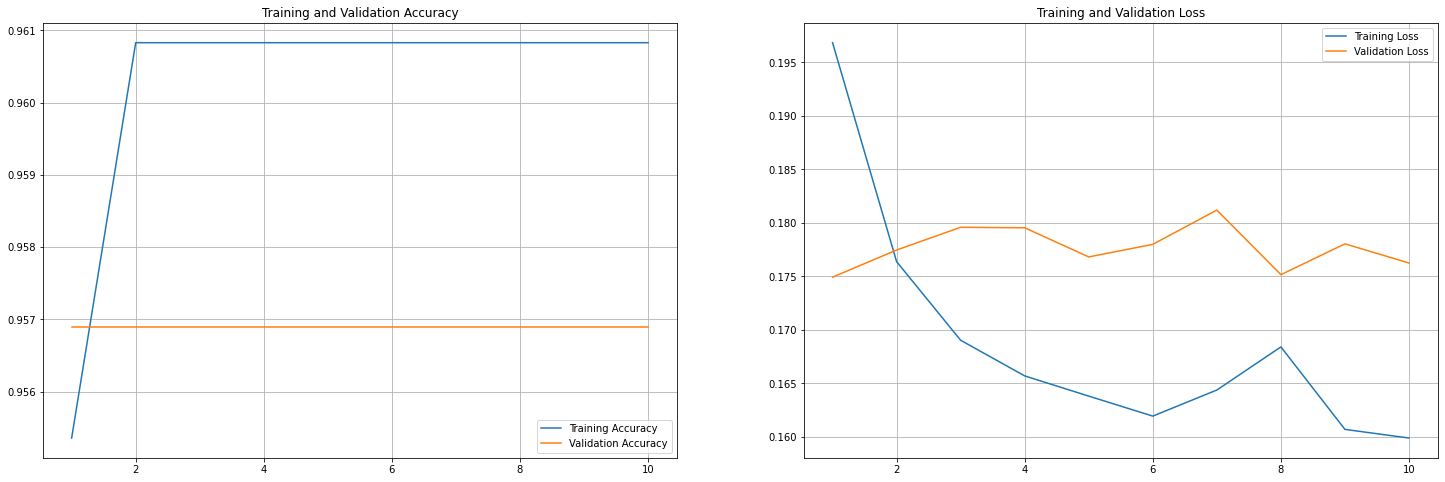

In [ ]:
acc = history_l.history['accuracy']
val_acc = history_l.history['val_accuracy']

loss = history_l.history['loss']
val_loss = history_l.history['val_loss']

epochs_range = range(1, epochs_l+1)

plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
plt.xticks(range(0, epochs_l+1, 2))
plt.grid()
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.xticks(range(0, epochs_l+1, 2))
plt.grid()
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

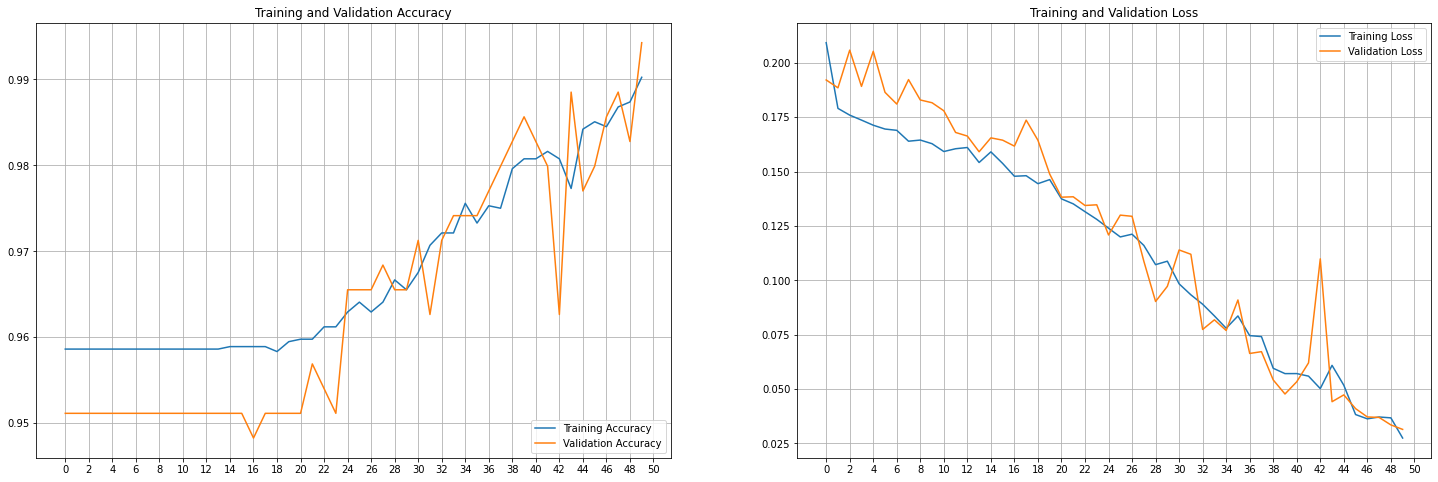

In [ ]:
acc = history_r.history['accuracy']
val_acc = history_r.history['val_accuracy']

loss = history_r.history['loss']
val_loss = history_r.history['val_loss']

epochs_range = range(epochs_r)

plt.figure(figsize=(25, 8))
plt.subplot(1, 2, 1)
plt.xticks(range(0, epochs_r+1, 2))
plt.grid()
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.xticks(range(0, epochs_r+1, 2))
plt.grid()
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
score = model_l.evaluate(X_l_test, y_l_test)
print("%s: %.2f%%" % (model_l.metrics_names[1], score[1]*100))

score = model_r.evaluate(X_r_test, y_r_test)
print("%s: %.2f%%" % (model_r.metrics_names[1], score[1]*100))

11/11 [==============================] - 0s 3ms/step - loss: 0.1762 - accuracy: 0.9569
accuracy: 95.69%
11/11 [==============================] - 0s 2ms/step - loss: 0.0314 - accuracy: 0.9943
accuracy: 99.43%


In [ ]:
from tensorflow.keras.models import model_from_json

model_json = model_l.to_json()
with open("/content/drive/My Drive/DMW/Preprocessing/amd/Model/Left_amd.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model_l.save_weights("/content/drive/My Drive/DMW/Preprocessing/amd/Model/Left_amd.h5")
print("Saved model to disk")

model_json = model_r.to_json()
with open("/content/drive/My Drive/DMW/Preprocessing/amd/Model/Right_amd.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model_r.save_weights("/content/drive/My Drive/DMW/Preprocessing/amd/Model/Right_amd.h5")
print("Saved model to disk")

NameError: ignored

In [ ]:
# load json and create model
json_file = open('/content/drive/My Drive/DMW/Preprocessing/amd/Model/Left_amd.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model_l = model_from_json(loaded_model_json)
# load weights into new model
loaded_model_l.load_weights("/content/drive/My Drive/DMW/Preprocessing/amd/Model/Left_amd.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model_l.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])


# load json and create model
json_file = open('/content/drive/My Drive/DMW/Preprocessing/amd/Model/Right_amd.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model_r = model_from_json(loaded_model_json)
# load weights into new model
loaded_model_r.load_weights("/content/drive/My Drive/DMW/Preprocessing/amd/Model/Right_amd.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model_r.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

Loaded model from disk
Loaded model from disk


In [ ]:
score = loaded_model_l.evaluate(X_l_test, y_l_test)
print("%s: %.2f%%" % (loaded_model_l.metrics_names[1], score[1]*100))

score = loaded_model_r.evaluate(X_r_test, y_r_test)
print("%s: %.2f%%" % (loaded_model_r.metrics_names[1], score[1]*100))

11/11 [==============================] - 0s 2ms/step - loss: 0.1762 - accuracy: 0.9569
accuracy: 95.69%
11/11 [==============================] - 0s 2ms/step - loss: 0.0314 - accuracy: 0.9943
accuracy: 99.43%


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred_l = loaded_model_l.predict(x_l_np)
y_pred_l = np.asarray([y > 0.5 for y in y_pred_l])
y_pred_r = loaded_model_l.predict(x_r_np)
y_pred_r = np.asarray([y > 0.5 for y in y_pred_r])

cm_l = confusion_matrix(y_l_np, y_pred_l)
cm_r = confusion_matrix(y_r_np, y_pred_r)
print(cm_l)
print(cm_r)

[[3330    6]
 [ 121   15]]
[[3326   10]
 [  64   80]]
